<a href="https://colab.research.google.com/github/BurglachOK/G_Collab/blob/main/%D0%94%D0%972_Buriak_Serhii_Viktorovich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1
Виріши аналітично задачу з текстовою умовою

Над проектом працювало 3 типи спеціалістів - дизайнери, розробники та тестувальники. Ми знаємо кількість годин на кожному етапі розробки та кількість грошей, які закладені на виконання кожного етапу в якості собівартості.
Всю розробку менеджер розділив на 3 етапи: створення дизайну, розробка програмної частини, фінальне тестування.

На першому етапі відпрацьовано 20 годин дизайнером та 3 години розробниками - на даному етапі до смети закладено 775 доларів.
На другому етапі дизайнери відпрацювали 8 годин, розробники - 28, а тестувальники - 4. Даний етап було оцінено в 1012 доларів.
На фінальному етапі дизайнери відпрацювали 4 години, розробники - 12, а тестувальники 32. Трудові ресурси на цьому етапі оцінені в 696 доларів.

Знайди вартість години у кожного спеціаліста шляхом вирішення системи лінійних рівнянь, базуючись на даних по етапах розробки.

*Рішення потрібно розписати*

Розв'язок:

$$
\overline x =
\left (\begin{array}{cc}
x = 35 \\
y = 25 \\
z = 8
\end{array}\right)
\\
A =
\left (\begin{array}{cc}
20 & 3 & 0 \\
8 & 28 & 4 \\
4 & 12 & 32
\end{array}\right)
\\
b =
\left (\begin{array}{cc}
775 \\
1012 \\
696
\end{array}\right)
\\
A \overline x = b
$$

*Розв'язувати можна будь-яким методом, але метод Крамера, потенційно, буде найлегшим*

$\Delta = \left|A\right|$

Перевірка: $x+y+z = 68$

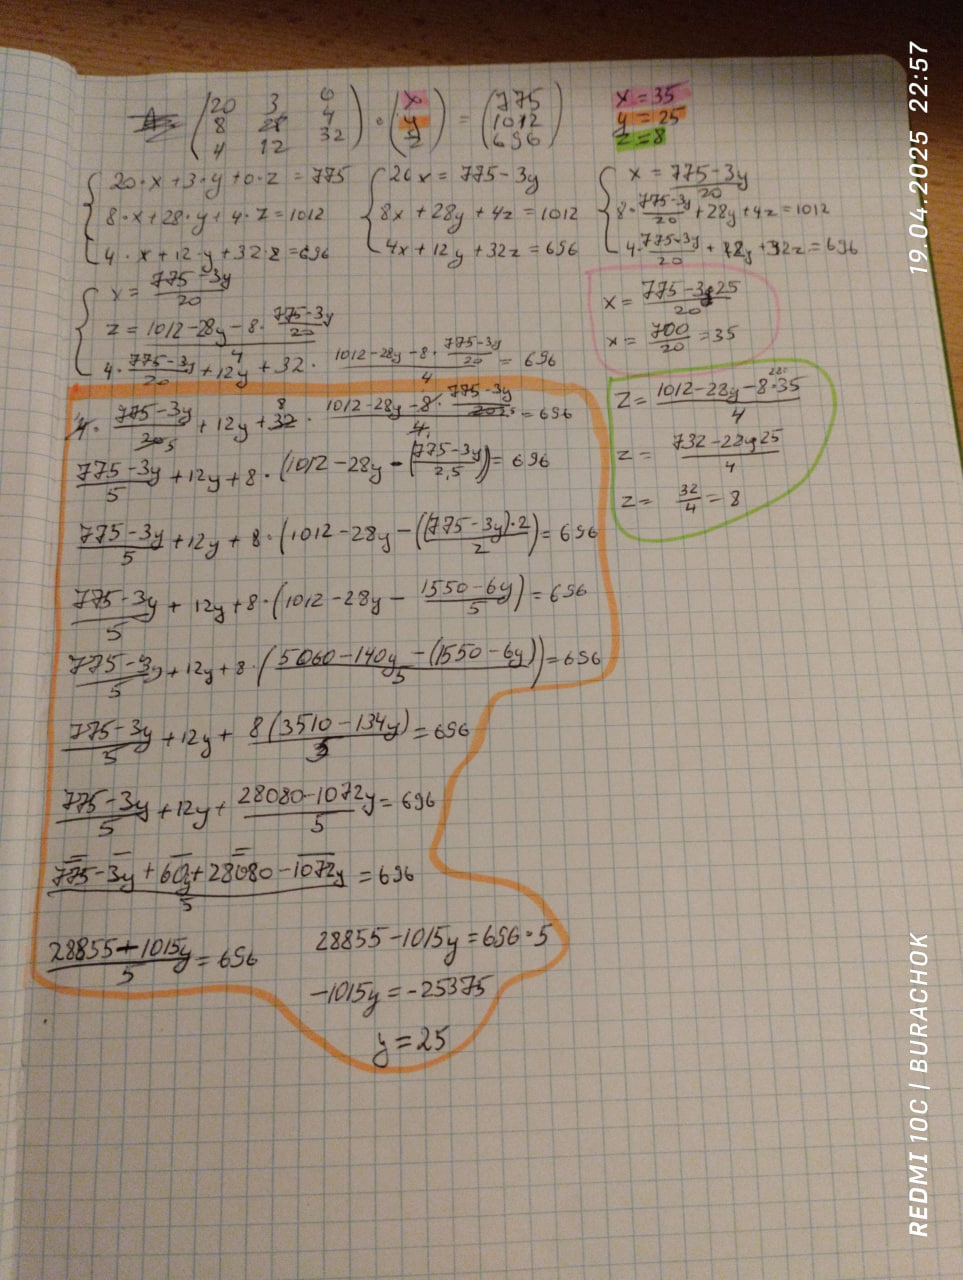

# Завдання 2
- Задай матрицю та вектор вільних членів для наступної системи:

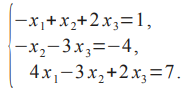


In [ ]:
import numpy as np
A = np.array(
    [[-1, 1, 2],
     [0, -1, -3],
     [4, -3, 2]]
    )
B = np.array(
   [[1, -4, 7]]
)


- Напиши функцію для вирішення системи матричним методом *(solve не є матричним методом)*
- Напиши функцію для вирішення системи методом Крамера

In [ ]:
# Напиши функцію для вирішення системи матричним методом
def solve_inv_matrix(a, b, verbose=False):
    # ith row, jth column removed
    def minor(arr, i, j):
        if verbose:
            print(f'\nMinor num {i+1}{j+1}\n')
            print(arr, i, j)
        return arr[np.array(list(range(i))+list(range(i+1, arr.shape[0])))[:, np.newaxis],
                   np.array(list(range(j))+list(range(j+1, arr.shape[1])))]


    def cycle(arr):
        C = np.zeros_like(arr)
        for row in range(len(arr)):
            for col in range(len(arr)):
                C[row][col] = np.linalg.det(minor(arr, row, col)) * (-1)**(row+col)
        if verbose:
            print('\nAdjugate matrix\n')
            print(C)
        return C

    inv_matrix = 1/np.linalg.det(A) * cycle(a).T
    if verbose:
        print('\nInverse matrix\n')
        print(inv_matrix)
    return inv_matrix@b.T

    # inv_matrix = np.linalg.inv(a)
    # return inv_matrix@b.T

print(f"\nВектор рішення: \r\n {solve_inv_matrix(A, B)}")


Вектор рішення: 
 [[2.]
 [1.]
 [1.]]


In [ ]:
# Напиши функцію для вирішення системи методом Крамера
def solve_cramer(a, b, verbose=False):

    deltaall = np.linalg.det(a)
    if verbose:
        print(f'\ndeterminant delta\n')
        print(deltaall)

    deltax = np.array(a, copy=True)
    deltax[:, 0] = b[0]
    deltax = np.linalg.det(deltax)
    if verbose:
        print(f'\ndeterminant delta x\n')
        print(deltax)


    deltay = np.array(a, copy=True)
    deltay[:, 1] = b[0]
    deltay = np.linalg.det(deltay)
    if verbose:
        print(f'\ndeterminant delta y\n')
        print(deltay)


    deltaz = np.array(a, copy=True)
    deltaz[:, 2] = b[0]
    deltaz = np.linalg.det(deltaz)
    if verbose:
        print(f'\ndeterminant delta z\n')
        print(deltaz)


    x = deltax / deltaall
    y = deltay / deltaall
    z = deltaz / deltaall
    return np.array([x, y, z])

print(f"Вектор рішення: \r\n {solve_cramer(A, B)}")

Вектор рішення: 
 [2. 1. 1.]
